# <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Описание</div>

Нужно защитить данные клиентов страховой компании. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Содержание</div>
****

<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></li></ul></div>

****

## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Загрузка данных</div>

### Импорт библиотек


In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import r2_score

pio.renderers.default='notebook'

### Загрузка данных


In [19]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except FileNotFoundError:
    print("No such file or directory")

Создадим функцию для ознакомления с данными:


In [20]:
def check_df(df):
    print('**************************************************************************************')
    print('СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ')
    print('**************************************************************************************')
    print('===ОБЩАЯ ИНФОРМАЦИЯ===')
    display(df.info())
    print('**************************************************************************************')
    print('===ПЕРВЫЕ 5 СТРОК ДАТАФРЕЙМА===')
    display(df.head(5))
    print('**************************************************************************************')
    print('===СТАТИСТИКА===')
    display(df.describe())
    print('**************************************************************************************')
    print('===КОЛИЧЕСТВО ДУБЛИКАТОВ===')
    print(df.duplicated().sum())
    print('**************************************************************************************')
    print('===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===')
    print(df.isna().sum())
    print('**************************************************************************************')
    print('===МАТРИЦА КОРРЕЛЯЦИИ===')
    fig = px.imshow(
    round(df.corr(), 4),
    text_auto=True,
    template="plotly_dark",
    color_continuous_scale=px.colors.sequential.Blues,
    aspect="auto",
    title="<b>Correlation matrix",
    )
    fig.update_layout(title_x=0.5)
    fig.show("png")


**************************************************************************************
СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

**************************************************************************************
===ПЕРВЫЕ 5 СТРОК ДАТАФРЕЙМА===


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**************************************************************************************
===СТАТИСТИКА===


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
153
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
**************************************************************************************
===МАТРИЦА КОРРЕЛЯЦИИ===


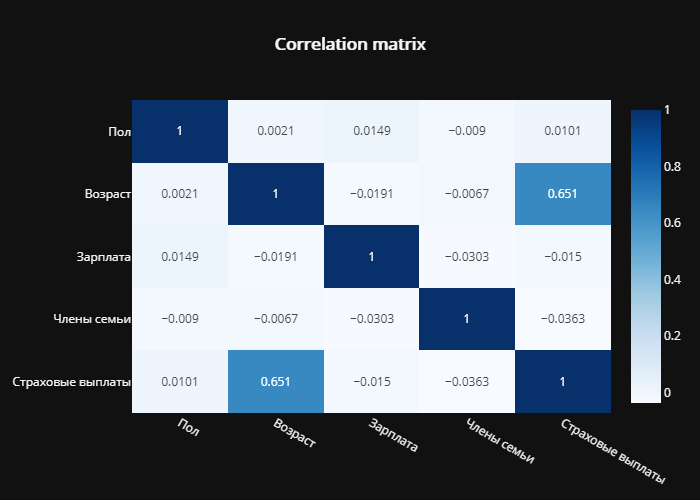

In [21]:
check_df(data)

Итак, удалим 153 дубликата и сменим тип данных признаков "Возраст" и "Зарплата" на целочисленный.

Сначала дубликаты:


In [22]:
data = data.drop_duplicates()

Переименуем признаки:

In [23]:
data.rename(
    columns={
        "Пол": "sex",
        "Возраст": "age",
        "Зарплата": "salary",
        "Члены семьи": "family_members",
        "Страховые выплаты": "insurance_payments",
    },
    inplace=True,
)

Теперь типы данных:


In [24]:
data[['salary', 'age']] = data[['salary', 'age']].astype('int64')


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sex                 4847 non-null   int64
 1   age                 4847 non-null   int64
 2   salary              4847 non-null   int64
 3   family_members      4847 non-null   int64
 4   insurance_payments  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


Прикинем распределение страховых выплат в зависимости от количества членов семьи:

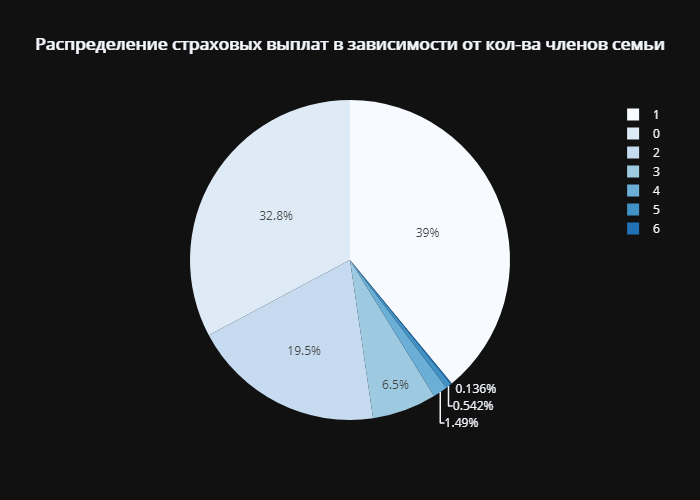

In [26]:
fig = px.pie(
    data.groupby(["family_members"]).sum(),
    values="insurance_payments",
    names=data.groupby(["family_members"]).sum().index,
    template="plotly_dark",
    color_discrete_sequence=px.colors.sequential.Blues,
    title="<b>Распределение страховых выплат в зависимости от кол-ва членов семьи"
)
fig.show("png")

Как ни странно, почти 40% страховых выплат получают люди, у которых есть еще один член семьи. Это могут быть молодожены, либо матери одиночки. Треть всех выплат получают одинокие клиенты, пятую часть семьи с одним ребенком. Ну и так далее по убыванию суммы выплат и возрастанию количества членов семьи. Вероятно, это связанно с тем, что большие семьи в наше время редкость. Проверим это предположение:

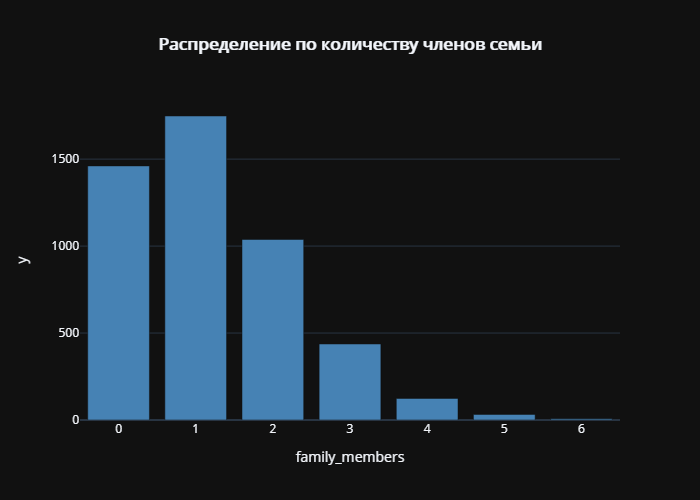

In [27]:
fig = px.bar(
    x=data["family_members"].value_counts().index,
    y=data["family_members"].value_counts(),
    color_discrete_sequence=["steelblue"],
    template="plotly_dark",
    title="<b>Распределение по количеству членов семьи",
)
fig.update_layout(title_x=0.5, xaxis_title="family_members",)
fig.show("png")

Да, так и есть, клиентов с большими семьями мало, но наступление страхового случая с последующей выплатой страховки никак не связано с количеством членов семьи клиента.

### Вывод


Дубликаты удалили, тип данных изменили. Все красиво, едем дальше.


## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Умножение матриц</div>


Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)


Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


**Ответ:** Качество (метрика R2) не изменится

**Обоснование:** Представим матрицу $X_1$, как произведение матрицы $X$ и некой обратимой матрицы $Z$:


$$
X_1 = XZ
$$

Тогда, формула обучения примет вид:

$$
w_1 = (X_1^T X_1)^{-1} X_1^T y
$$

Подставим в полученную формулу значения $X_1$:

$$
w_1 = ((XZ)^T XZ)^{-1} (XZ)^T y
$$

Воспользовавшись ассоцицативным свойством умножения матриц, получим:

$$
w_1 = (Z^T (X^T X) Z)^{-1} (XZ)^T y
$$

Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке, из чего следует:

$$
w_1 = (Z^T (X^T X) Z)^{-1} Z^T X^T y =
$$

$$
= Z^{-1} (X^T X)^{-1} (Z^T)^{-1} Z^T X^T y
$$


Выражение $(Z^T)^{-1} Z^T$ является произведением обратной матрицы на исходную, что в результате дает единичную матрицу $E$, следовательно:

$$
w_1 = Z^{-1} (X^T X)^{-1} EX^T y
$$


Произведение любой матрицы и единичной матрицы подходящего размера равно самой матрице, тогда:

$$
w_1 = Z^{-1} (X^T X)^{-1} X^T y = Z^{-1}w
$$


Теперь применим те свойства матриц для формулы предсказаний. Пусть

$$
a_1 = X_1 w_1
$$

тогда, подставив в формулу найденные значения $X_1$ и $w_1$, получим:

$$
a_1 = XZZ^{-1}w = XEw = Xw
$$

Из чего делаем вывод, что:

$$
a = a_1
$$


Следовательно, качество (метрика R2) не изменится, что и требовалось ~~доказать~~ обосновать.


## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Алгоритм преобразования</div>

**Алгоритм**

1. Сгенерировать обратимую матрицу $Z$ замером 4x4
1. Получить произведение матрицы исходных признаков и сгенерированной матрицы
1. Рассчитать метрики R2 для исходной и произведения матриц
1. Сравнить значения полученных метрик


**Обоснование**

Выше мы доказали, что предсказания исходной и измененной матриц идентичны, из чего следует, что и метрики R2 долюны оказаться таковыми, при условии верных рассчетов.


## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Проверка алгоритма</div>


Подготовим исходные данные для обучения модели:


In [28]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']


Генерируем квадратную матрицу размером 4х4:


In [29]:
matrix_gen = np.random.normal(size=(4, 4))
print(matrix_gen)

[[-0.2862812   0.59454659 -0.78595136  0.090662  ]
 [-0.25620911  0.91608139  0.08131179 -1.54583397]
 [-0.58174361  0.47776669  0.02559423  1.62651129]
 [ 0.57112782  1.28524955 -0.83372884 -0.11449429]]


Проверим сгенерированную матрицу на обратимость. Используя конструкцию try...except попробуем инвертировать матрицу методом linalg.inv(), а обработчик ошибок поможет нам, если что-то вдруг пойдет не по плану:


In [30]:
try:
    np.linalg.inv(matrix_gen)
    print("Матрица обратима!")
except np.linalg.LinAlgError:
    try:
        print("Матрица необратима!")
    except Exception:
        print(
            "Матрица не соответствует требованиям к обратимой матрице, возможно не квадратная!"
        )

Матрица обратима!


In [31]:
matrix_origin = features.values  # Преобразуем предсказания в матрицу
matrix_derived = matrix_origin @ matrix_gen
# Получаем "закодированные" признаки
features_encrypted = pd.DataFrame(matrix_derived, columns=features.columns)
features_encrypted.sample(n=5)

,sex,age,salary,family_members
3301,-24440.120778,20093.731035,1075.614620,68270.167179
3201,-16875.176558,13871.723461,743.696220,47141.002525
2393,-26187.173720,21530.647796,1154.504855,73140.449891
1418,-20599.755520,16941.161587,906.644939,57534.987480
2666,-21648.548698,17800.403292,954.544630,60459.845131


Создадим новый класс LinearRegression - модели линейной регрессии, используя формулы из раздела выше:


In [32]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1
        )
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Теперь обучим нашу свежеиспеченную модель на исходных данных и рассчитаем метрику R2:


In [33]:
lr = LinearRegression()
lr.fit(features, target)
predictions = lr.predict(features)
print(f'Метрика R2 = {r2_score(target, predictions)}')


Метрика R2 = 0.4302010046633359


Теперь обучим модель с использованием "закодированных" предсказаний и также рассчитаем метрику R2:


In [34]:
model = LinearRegression()
model.fit(features_encrypted, target)
predictions = model.predict(features_encrypted)
print(f'Метрика R2 = {r2_score(target, predictions)}')


Метрика R2 = 0.4302010046633292


## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Вывод</div>


Мы разработали, математически обосновали и реализовали метод преобразования исходных данных, основанный на преобразовании исходных данных методом умножения матриц, без потери качества модели. Полученные метрики обнаруживают различия начиная с 13 символа после запятой (10-тимиллиардная?), что можно отности к погрешности округления.